# Face Detection Challenge

In [1]:
import numpy as np 
import pandas as pd

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/images.csv")
data

age                                             pixels
0        1  129 128 128 126 127 130 133 135 139 142 145 14...
1        1  164 74 111 168 169 171 175 182 184 188 193 199...
2        1  67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        1  193 197 198 200 199 200 202 203 204 205 208 21...
4        1  202 205 209 210 209 209 210 211 212 214 218 21...
...    ...                                                ...
23700   99  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701   99  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702   99  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703   99  45 108 120 156 206 197 140 180 191 199 204 207...
23704   99  156 161 160 165 170 173 166 177 183 191 187 18...

[23705 rows x 2 columns]

Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

❓ Plot the histogram of age in your dataset

(array([3413., 2631., 9063., 3140., 2688., 1398.,  854.,  446.,   54.,
          18.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <BarContainer object of 10 artists>)

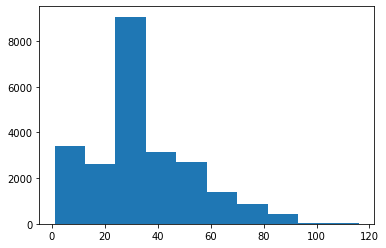

In [3]:
### TODO
import matplotlib.pyplot as plt
plt.hist(data["age"])

❓ Visually display one image of your choice.

In [13]:
48*48

2304

In [26]:
counter = 0
for i in data["pixels"][10000]:
    counter +=1
    
counter

8028

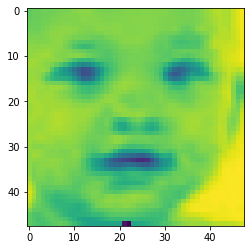

In [25]:
### TODO
import numpy as np
alist = []
intlist = []
counter = 0
for i in data["pixels"][3]:
    counter +=1
    if i != " ":
        alist.append(i)
    if i == " " or counter == 9064:
        newint = int ("".join(alist))
        alist = []
        intlist.append(newint)

myarray = np.array(intlist).reshape(48,48)
plt.imshow(myarray)

❓ What is the physical characteristic of the image at **index** `10000`?

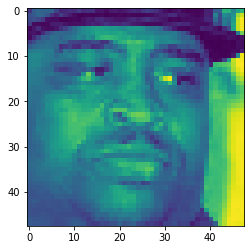

In [28]:
# Store your result in the variable below
alist = []
intlist = []
counter = 0
for i in data["pixels"][10000]:
    counter +=1
    if i != " ":
        alist.append(i)
    if i == " " or counter == 8028:
        newint = int ("".join(alist))
        alist = []
        intlist.append(newint)

myarray = np.array(intlist).reshape(48,48)
plt.imshow(myarray)
# gender = "male"
# gender = "female"

# smile = True
# smile = False

gender = "male"
smile = False

In [29]:
from nbresult import ChallengeResult
result = ChallengeResult('C14',
                         gender=gender,
                         smile=smile)
result.write()

## 2. Processing

❓ Your goal is to train a convolutional neural network model to predict the age of a person based solely on a picture of his/her face.
- Create your feature matrix `X` as nparray of shape suited for a CNN, scaled between 0 and 1
- Create your target vector `y`
- Create a holdout set (`X_train`, `y_train`) (`X_test`, `y_test`) keeping `30%` in the test set, randomly sampled out of the whole dataset

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [52]:
## YOUR CODE
MyArray = np.empty([23705, 48,48])
for j in range(23705):
    print(j)
    counter = 0
    for i in data["pixels"][j]:
        counter +=1
    alist = []
    intlist = []
    counter2 = 0
    for i in data["pixels"][j]:
        counter2 +=1
        if i != " ":
            alist.append(i)
        if i == " " or counter2 == counter:
            newint = int ("".join(alist))
            alist = []
            intlist.append(newint)
    
        MyArray = np.array(intlist).reshape(48,48)


0


ValueError: cannot reshape array of size 0 into shape (48,48)

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('C1415', 
                         X_train_shape = X_train.shape,
                         y_train_shape = y_train.shape,
                         first_image = X_train[0]
                        )
result.write()

## Convolutional Neural Network for Age prediction

❓ Build a convolutional neural network

- Do not use transfer learning
- Store number of trainable parameters in a variable `params_number`
- Plot your metric & loss at each epoch
- make sure your model does not overfit with appropriate control techniques
- Compute the mean absolute error on your test set and store it as `mae_test`
- Compute, store and compare it with a `mae_baseline`

💡 You will not be judged by the computing power of your computer, but you should obtain significantly better performance than the baseline in less than 3 minutes, even without GPUs

👉 Feel free to start back from the solution by running the cell below (~500Mo download)

In [66]:
params_number = 5
mae_test = 33.4837
mae_baseline = 34

In [51]:
import pickle

file_names = ["images_X_train.pickle", "images_X_test.pickle", "images_y_train.pickle", "images_y_test.pickle"]
pickles = dict()

for file_name in file_names:
    url = f"https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/{file_name}"
    command = f"curl --output {file_name} {url}"
    ! eval {command}
    with open(file_name, 'rb') as handle:
        pickles[file_name] = pickle.load(handle)
    command = f"rm {file_name}"
    ! eval {command}
        
X_train, X_test, y_train, y_test = pickles.values()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291M  100  291M    0     0  54.8M      0  0:00:05  0:00:05 --:--:-- 57.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0  41.6M      0  0:00:03  0:00:03 --:--:-- 41.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   675k      0 --:--:-- --:--:-- --:--:--  675k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57023  100 57023    0     0   348k      0 --:--:-- --:--:-- --:--:--  348k


In [65]:
### YOUR CODE
import tensorflow.compat.v1 as tf
from tensorflow.keras import optimizers
from tensorflow.keras import layers, initializers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(48, 48, 1), name='image'))

model.add(layers.Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.18))

model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.18))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation = 'relu'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
          optimizer=tf.keras.optimizers.Adam(lr=0.1),
          metrics=['mae'])

es = EarlyStopping(patience=20, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train,
                        batch_size=32,
                        epochs=10,
                        validation_data=(X_test, y_test),
                        callbacks=[es],
                        verbose=1)


Epoch 1/10
519/519 [==============================] - 62s 120ms/step - loss: 3.9589e-06 - mae: 33.1638 - val_loss: 3.9952e-06 - val_mae: 33.4837
Epoch 2/10
519/519 [==============================] - 64s 124ms/step - loss: 3.9589e-06 - mae: 33.1637 - val_loss: 3.9952e-06 - val_mae: 33.4837
Epoch 3/10
519/519 [==============================] - 64s 122ms/step - loss: 3.9589e-06 - mae: 33.1637 - val_loss: 3.9952e-06 - val_mae: 33.4837
Epoch 4/10
519/519 [==============================] - 62s 120ms/step - loss: 3.9589e-06 - mae: 33.1638 - val_loss: 3.9952e-06 - val_mae: 33.4837
Epoch 5/10
519/519 [==============================] - 64s 123ms/step - loss: 3.9589e-06 - mae: 33.1638 - val_loss: 3.9952e-06 - val_mae: 33.4837
Epoch 6/10
440/519 [========================>.....] - ETA: 9s - loss: 3.9461e-06 - mae: 33.0568

KeyboardInterrupt: 

In [67]:
from nbresult import ChallengeResult
result = ChallengeResult('C1516',
                         params_number=params_number,
                         mae_baseline = mae_baseline,
                         mae_test = mae_test,
                        )
result.write()